# Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Datasets/Admission_Predict.csv')

data.columns = data.columns.str.strip()

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standard = data[['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']]
df_standard = df_standard.dropna()
df_standard = scaler.fit_transform(df_standard)
df_standard = pd.DataFrame(df_standard, columns=['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit'])
df_standard.head()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,1.762107,1.746971,1.764818,1.373648
1,0.627656,-0.067635,0.455151,0.250297
2,-0.070467,-0.562528,-1.005631,-0.030541
3,0.453126,0.427257,0.119339,0.531135
4,-0.244998,-0.727492,-0.653029,-0.522007


In [11]:
df = data[['TOEFL Score', 'CGPA', 'Chance of Admit']]
df = df.dropna()
df.isnull().sum()
df.head()

,TOEFL Score,CGPA,Chance of Admit
0,118,9.65,0.92
1,107,8.87,0.76
2,104,8.00,0.72
3,110,8.67,0.80
4,103,8.21,0.65


# MBE (Mean Bias Error)

In [242]:
x = df[['TOEFL Score', 'CGPA']].values
y = df[['Chance of Admit']].values.squeeze()

x = np.c_[np.ones(x.shape[0]), x]
w = np.random.rand(3)


In [243]:
print(x.shape)
print(y.shape)
print(w.shape)

(400, 3)
(400,)
(3,)


In [244]:
def calculate_y_hat(x, w):
    y_hat = np.dot(x, w)
    return y_hat

y_hat = calculate_y_hat(x, w)
print(y_hat.shape)
# y_hat

(400,)


In [245]:
def calculate_loss_MBE(y, y_hat):
    loss = np.sum(y - y_hat, axis = 0) / y.shape[0]
    return loss

loss = calculate_loss_MBE(y, y_hat)
loss.shape, loss

((), -110.06986879761929)

In [246]:
def calculate_GD_MBE(x):
    dldw = np.sum(-x, axis = 0) / x.shape[0]
    return dldw

dldw = calculate_GD_MBE(x)
dldw

array([  -1.      , -107.41    ,   -8.598925])

In [247]:
def calculate_GD_flex(w, x, y, y_hat_function, loss_function, epsilon=1e-10):
    delta_w = np.eye(len(w)) * epsilon

    y_hat_w_delta = y_hat_function(x, (w + delta_w).T)
    loss1 = loss_function(y.reshape(-1, 1), y_hat_w_delta)
    
    y_hat_w = y_hat_function(x, w)
    loss2 = loss_function(y, y_hat_w)

    loss_diff = loss1 - loss2
    GD = loss_diff / np.diagonal(delta_w)

    return GD

GD = calculate_GD_flex(w, x, y, calculate_y_hat, calculate_loss_MBE)    
GD.shape, GD

((3,), array([  -0.9993073 , -107.4100453 ,   -8.59884608]))

In [ ]:
# def calculate_GD_flex(w, x, y, y_hat_function, loss_function, epsilon=1e-10):
#     dldw = []
#     base_loss = loss_function(y, y_hat_function(x, w))
    
#     for i in range(len(w)):
#         w_delta = np.copy(w)
#         w_delta[i] += epsilon
#         delta_loss = loss_function(y, y_hat_function(x, w_delta))
#         derivative = (delta_loss - base_loss) / epsilon
#         dldw.append(derivative)
        
#     return np.array(dldw)

# GD = calculate_GD_flex(w, x, y, calculate_y_hat, calculate_loss_MBE)    
# GD.shape, GD

((3,), array([  -0.99987574, -107.4100453 ,   -8.59884608]))

In [199]:
def update_weights(w, dldw, learning_rate):
    w = w - learning_rate * dldw
    return w

## Optimization (Mini Batch)

### Mini-batch

In [200]:
X = df[['TOEFL Score', 'CGPA']].values
y = df[['Chance of Admit']].values.squeeze()

X = np.c_[np.ones(X.shape[0]), X]
w = np.random.rand(3)


In [201]:
print(X.shape)
print(y.shape)
print(w.shape)

(400, 3)
(400,)
(3,)


## Manual Derivative

Epoch: 1 Loss: -355648.4714540079
Epoch: 2 Loss: -714934.3981415085
Epoch: 3 Loss: -1074220.324829009
Epoch: 4 Loss: -1433506.251516508
Epoch: 5 Loss: -1792792.1782040074
Epoch: 6 Loss: -2152078.104891505
Epoch: 7 Loss: -2511364.031579003
Epoch: 8 Loss: -2870649.958266501
Epoch: 9 Loss: -3229935.884953999
Epoch: 10 Loss: -3589221.811641497
Epoch: 11 Loss: -3948507.738328999
Epoch: 12 Loss: -4307793.665016502
Epoch: 13 Loss: -4667079.591704004
Epoch: 14 Loss: -5026365.518391507
Epoch: 15 Loss: -5385651.44507901
Epoch: 16 Loss: -5744937.371766513
Epoch: 17 Loss: -6104223.2984540155
Epoch: 18 Loss: -6463509.225141518
Epoch: 19 Loss: -6822795.151829021
Epoch: 20 Loss: -7182081.078516523
Epoch: 21 Loss: -7541367.005204031
Epoch: 22 Loss: -7900652.93189154
Epoch: 23 Loss: -8259938.858579049
Epoch: 24 Loss: -8619224.785266556
Epoch: 25 Loss: -8978510.711954065
Epoch: 26 Loss: -9337796.638641573
Epoch: 27 Loss: -9697082.565329082
Epoch: 28 Loss: -10056368.492016591
Epoch: 29 Loss: -10415654.41

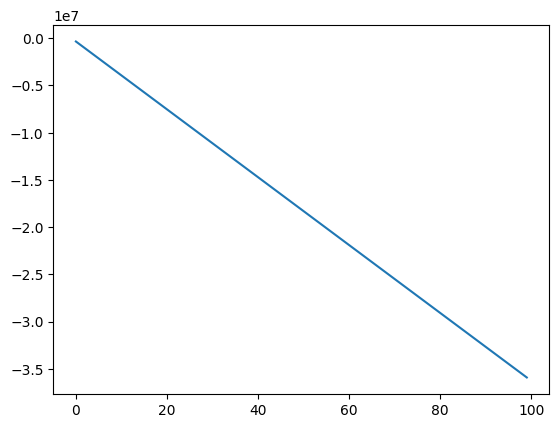

In [202]:
batch_size = 4
epochs = 100
learning_rate = 0.3
losses = []

for epoch in range(epochs):
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i:i+batch_size, :]
        y_batch = y[i:i+batch_size]

        # Calculate y_hat
        y_hat = calculate_y_hat(X_batch, w)

        # Calculate cost
        loss = calculate_loss_MBE(y_batch, y_hat)

        # Calculate gradient
        dldw = calculate_GD_MBE(X_batch)

        # Update weights
        w = w - learning_rate * dldw
    
    losses.append(loss)
    print(f'Epoch: {epoch+1} Loss: {loss}')

plt.plot(losses)



## Using Definition of Derivative

In [203]:
X = df[['TOEFL Score', 'CGPA']].values
y = df[['Chance of Admit']].values.squeeze()

X = np.c_[np.ones(X.shape[0]), X]
w = np.random.rand(3)

Epoch: 1 Loss: -355905.803955229
Epoch: 2 Loss: -715794.1671191474
Epoch: 3 Loss: -1074890.6150563378
Epoch: 4 Loss: -1434650.717639433
Epoch: 5 Loss: -1794286.7505932914
Epoch: 6 Loss: -2146865.3956996966
Epoch: 7 Loss: -2498882.802539574
Epoch: 8 Loss: -2851186.0672021974
Epoch: 9 Loss: -3203525.3041992653
Epoch: 10 Loss: -3555363.023989903
Epoch: 11 Loss: -3918959.156946348
Epoch: 12 Loss: -4285668.119193124
Epoch: 13 Loss: -4652576.500886189
Epoch: 14 Loss: -5019149.606452392
Epoch: 15 Loss: -5385709.789917873
Epoch: 16 Loss: -5753871.615381049
Epoch: 17 Loss: -6119847.161100315
Epoch: 18 Loss: -6485281.375573086
Epoch: 19 Loss: -6851076.710374163
Epoch: 20 Loss: -7216872.045175241
Epoch: 21 Loss: -7582667.379976319
Epoch: 22 Loss: -7948072.95627992
Epoch: 23 Loss: -8313602.165655303
Epoch: 24 Loss: -8679470.842109133
Epoch: 25 Loss: -9046823.813916255
Epoch: 26 Loss: -9412758.847103525
Epoch: 27 Loss: -9775805.616156269
Epoch: 28 Loss: -10139135.972932983
Epoch: 29 Loss: -10502466

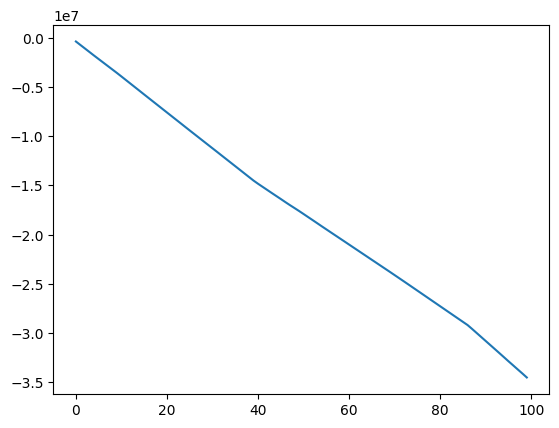

In [204]:
batch_size = 4
epochs = 100
learning_rate = 0.3
losses = []

for epoch in range(epochs):
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i:i+batch_size, :]
        y_batch = y[i:i+batch_size]

        # Calculate y_hat
        y_hat = calculate_y_hat(X_batch, w)

        # Calculate cost
        loss = calculate_loss_MBE(y_batch, y_hat)

        # Calculate gradient
        dldw = calculate_GD_flex(w, X_batch, y_batch, calculate_y_hat, calculate_loss_MBE)

        # Update weights
        w = w - learning_rate * dldw
    
    losses.append(loss)
    print(f'Epoch: {epoch+1} Loss: {loss}')

plt.plot(losses)



# MSE

In [205]:
X = df[['TOEFL Score', 'CGPA']].values
y = df[['Chance of Admit']].values.squeeze()

X = np.c_[np.ones(X.shape[0]), X]
w = np.random.rand(3)


In [206]:
print(X.shape)
print(y.shape)
print(w.shape)

(400, 3)
(400,)
(3,)


In [207]:
y_hat = calculate_y_hat(X, w)
print(y_hat.shape)

(400,)


In [208]:
def calculate_loss_MSE(y, y_hat):
    """Calculate loss function."""
    loss = np.mean((y - y_hat)**2, axis=0)
    return loss

loss = calculate_loss_MSE(y, y_hat)
loss.shape, loss

((), 6007.765548229283)

In [209]:
def calculate_GD_MSE(x,y,y_hat):
    dldw = np.dot(x.T, -2*(y-y_hat)) / x.shape[0]
    return dldw

dldw = calculate_GD_MSE(x,y,y_hat)
dldw

array([  154.78211697, 16677.05424968,  1335.34056494])

In [210]:
dldw = calculate_GD_flex(w, X, y, calculate_y_hat, calculate_loss_MSE)
dldw

array([  154.7687134 , 16677.04964348,  1335.33831104])

## Manual Derivative

In [211]:
X = df[['TOEFL Score', 'CGPA']].values
y = df[['Chance of Admit']].values.squeeze()

X = np.c_[np.ones(X.shape[0]), X]
w = np.random.rand(3)

Epoch: 1 Loss: 0.025786339715321564
Epoch: 2 Loss: 0.025783478763608033
Epoch: 3 Loss: 0.02578061897067483
Epoch: 4 Loss: 0.02577776034087735
Epoch: 5 Loss: 0.025774902873708063
Epoch: 6 Loss: 0.025772046568659814
Epoch: 7 Loss: 0.02576919142522554
Epoch: 8 Loss: 0.02576633744289846
Epoch: 9 Loss: 0.025763484621171954
Epoch: 10 Loss: 0.025760632959539682
Epoch: 11 Loss: 0.0257577824574955
Epoch: 12 Loss: 0.025754933114533488
Epoch: 13 Loss: 0.025752084930147905
Epoch: 14 Loss: 0.0257492379038334
Epoch: 15 Loss: 0.025746392035084546
Epoch: 16 Loss: 0.02574354732339638
Epoch: 17 Loss: 0.02574070376826411
Epoch: 18 Loss: 0.025737861369183032
Epoch: 19 Loss: 0.02573502012564884
Epoch: 20 Loss: 0.025732180037157375
Epoch: 21 Loss: 0.025729341103204666
Epoch: 22 Loss: 0.025726503323286964
Epoch: 23 Loss: 0.025723666696900842
Epoch: 24 Loss: 0.025720831223542902
Epoch: 25 Loss: 0.025717996902710143
Epoch: 26 Loss: 0.02571516373389966
Epoch: 27 Loss: 0.02571233171660892
Epoch: 28 Loss: 0.02570

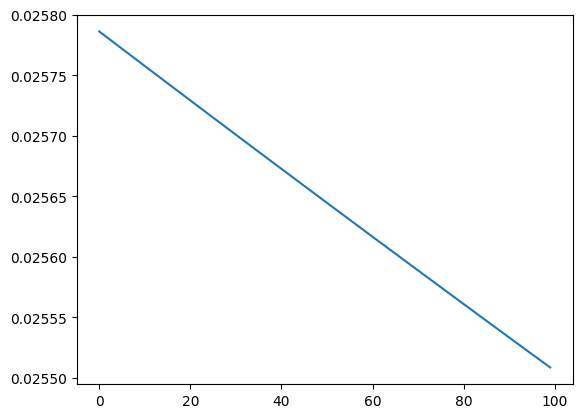

In [212]:
batch_size = 4
epochs = 100
learning_rate = 0.00001
losses = []

for epoch in range(epochs):
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i:i+batch_size, :]
        y_batch = y[i:i+batch_size]

        # Calculate y_hat
        y_hat = calculate_y_hat(X_batch, w)

        # Calculate cost
        loss = calculate_loss_MSE(y_batch, y_hat)

        # Calculate gradient
        dldw = calculate_GD_MSE(X_batch, y_batch, y_hat)

        # Update weights
        w = w - learning_rate * dldw
    
    losses.append(loss)
    print(f'Epoch: {epoch+1} Loss: {loss}')

plt.plot(losses)



## Using Definition of Derivative

In [216]:
X = df[['TOEFL Score', 'CGPA']].values
y = df[['Chance of Admit']].values.squeeze()

X = np.c_[np.ones(X.shape[0]), X]
w = np.random.rand(3)

Epoch: 1 Loss: 2526.8906342432765
Epoch: 2 Loss: 1588.2505799859018
Epoch: 3 Loss: 998.8415404484865
Epoch: 4 Loss: 628.6135678786427
Epoch: 5 Loss: 395.96989738153627
Epoch: 6 Loss: 249.70954720434827
Epoch: 7 Loss: 157.70057839268657
Epoch: 8 Loss: 99.77502463781771
Epoch: 9 Loss: 63.27174751371969
Epoch: 10 Loss: 40.24032071150505
Epoch: 11 Loss: 25.686812287655936
Epoch: 12 Loss: 16.473139981735144
Epoch: 13 Loss: 10.626429543086877
Epoch: 14 Loss: 6.90559328697625
Epoch: 15 Loss: 4.529287885939169
Epoch: 16 Loss: 3.0051305639910786
Epoch: 17 Loss: 2.0224573061419178
Epoch: 18 Loss: 1.3849607147949334
Epoch: 19 Loss: 0.96836105119521
Epoch: 20 Loss: 0.6937945653259802
Epoch: 21 Loss: 0.5110727529731706
Epoch: 22 Loss: 0.3881430044111374
Epoch: 23 Loss: 0.30444699097052424
Epoch: 24 Loss: 0.24673021730232342
Epoch: 25 Loss: 0.206394090629425
Epoch: 26 Loss: 0.17781955894217288
Epoch: 27 Loss: 0.15730335122204442
Epoch: 28 Loss: 0.14238101084157856
Epoch: 29 Loss: 0.13139455569298608

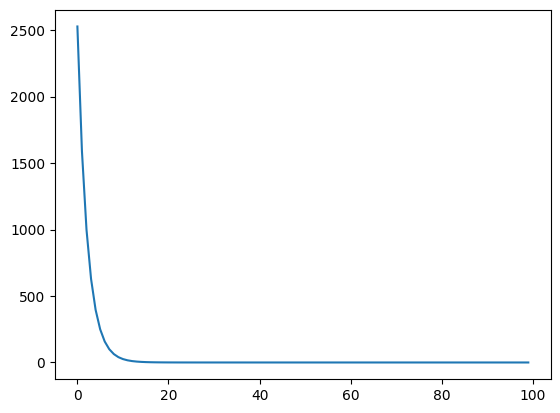

In [217]:
batch_size = 4
epochs = 100
learning_rate = 0.0000001
losses = []

for epoch in range(epochs):
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i:i+batch_size, :]
        y_batch = y[i:i+batch_size]

        # Calculate y_hat
        y_hat = calculate_y_hat(X_batch, w)

        # Calculate cost
        loss = calculate_loss_MSE(y_batch, y_hat)

        # Calculate gradient
        dldw = calculate_GD_flex(w, X_batch, y_batch, calculate_y_hat, calculate_loss_MSE)

        # Update weights
        w = w - learning_rate * dldw
    
    losses.append(loss)
    print(f'Epoch: {epoch+1} Loss: {loss}')

plt.plot(losses)



# MAE

In [227]:
X = df[['TOEFL Score', 'CGPA']].values
y = df[['Chance of Admit']].values.squeeze()

X = np.c_[np.ones(X.shape[0]), X]
w = np.random.rand(3)


In [228]:
def calculate_y_hat(X, w):
    y_hat = np.dot(X, w)
    return y_hat

def calculate_loss_MAE(y, y_hat):
    loss = np.mean(np.abs(y - y_hat))
    return loss

Epoch: 1 Loss: 108.10604536878671
Epoch: 2 Loss: 103.38668602990836
Epoch: 3 Loss: 98.66732737883538
Epoch: 4 Loss: 93.9479687277624
Epoch: 5 Loss: 89.22860938888405
Epoch: 6 Loss: 84.50924884634632
Epoch: 7 Loss: 79.78988813185724
Epoch: 8 Loss: 75.07052776127084
Epoch: 9 Loss: 70.35116756263577
Epoch: 10 Loss: 65.6318079658304
Epoch: 11 Loss: 60.91244871292773
Epoch: 12 Loss: 56.19309023380609
Epoch: 13 Loss: 51.47373175468445
Epoch: 14 Loss: 46.75437207190342
Epoch: 15 Loss: 42.03501256107373
Epoch: 16 Loss: 37.31565219048733
Epoch: 17 Loss: 32.59629194886443
Epoch: 18 Loss: 27.876930847484832
Epoch: 19 Loss: 23.1575698320809
Epoch: 20 Loss: 18.438209203567485
Epoch: 21 Loss: 13.718848532066236
Epoch: 22 Loss: 8.999488483888602
Epoch: 23 Loss: 4.280128650650145
Epoch: 24 Loss: 0.04039097790810159
Epoch: 25 Loss: 0.04830301078451382
Epoch: 26 Loss: 0.043745313436155425
Epoch: 27 Loss: 0.05235621246799316
Epoch: 28 Loss: 0.0475637670968192
Epoch: 29 Loss: 0.04376093019277941
Epoch: 30

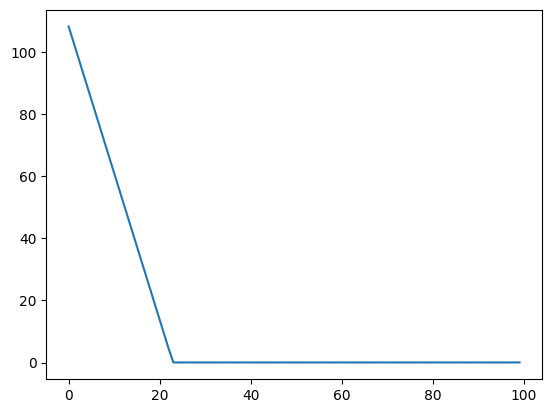

In [229]:
batch_size = 4
epochs = 100
learning_rate = 0.00001
losses = []

for epoch in range(epochs):
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i:i+batch_size, :]
        y_batch = y[i:i+batch_size]

        # Calculate y_hat
        y_hat = calculate_y_hat(X_batch, w)

        # Calculate cost
        loss = calculate_loss_MAE(y_batch, y_hat)

        # Calculate gradient
        dldw = calculate_GD_flex(w, X_batch, y_batch, calculate_y_hat, calculate_loss_MAE)

        # Update weights
        w = w - learning_rate * dldw
    
    losses.append(loss)
    print(f'Epoch: {epoch+1} Loss: {loss}')

plt.plot(losses)



# Logcosh

In [230]:
X = df[['TOEFL Score', 'CGPA']].values
y = df[['Chance of Admit']].values.squeeze()

X = np.c_[np.ones(X.shape[0]), X]
w = np.random.rand(3)


In [232]:
def calculate_loss_LogCosh(y, y_hat):
    loss = np.mean(np.log(np.cosh(y - y_hat)))
    return loss

Epoch: 1 Loss: 33.9982427698634
Epoch: 2 Loss: 29.278882270313495
Epoch: 3 Loss: 24.559521727775753
Epoch: 4 Loss: 19.840161572128533
Epoch: 5 Loss: 15.120801287517844
Epoch: 6 Loss: 10.401441540599748
Epoch: 7 Loss: 5.682090038524397
Epoch: 8 Loss: 1.0331244646980455
Epoch: 9 Loss: 0.006121791087278684
Epoch: 10 Loss: 0.006951536774372146
Epoch: 11 Loss: 0.006962906493846186
Epoch: 12 Loss: 0.006963017857765502
Epoch: 13 Loss: 0.0069630189018548595
Epoch: 14 Loss: 0.006963019024947334
Epoch: 15 Loss: 0.006963018955273697
Epoch: 16 Loss: 0.00696301880501106
Epoch: 17 Loss: 0.006963019000994727
Epoch: 18 Loss: 0.006963018811720404
Epoch: 19 Loss: 0.0069630188641469255
Epoch: 20 Loss: 0.00696301887103766
Epoch: 21 Loss: 0.006963018943062454
Epoch: 22 Loss: 0.006963019044575601
Epoch: 23 Loss: 0.006963018833821946
Epoch: 24 Loss: 0.006963018880442505
Epoch: 25 Loss: 0.00696301900874465
Epoch: 26 Loss: 0.006963019048193141
Epoch: 27 Loss: 0.0069630190347450115
Epoch: 28 Loss: 0.00696301891

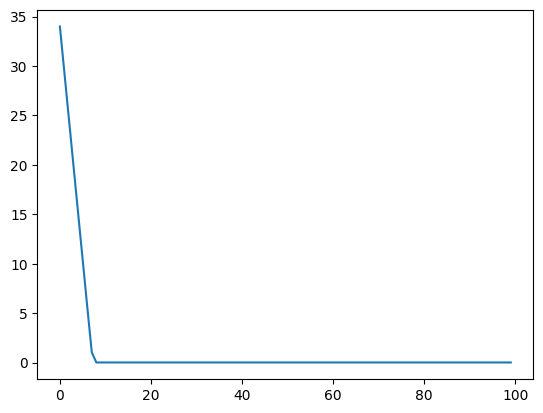

In [233]:
batch_size = 4
epochs = 100
learning_rate = 0.00001
losses = []

for epoch in range(epochs):
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i:i+batch_size, :]
        y_batch = y[i:i+batch_size]

        # Calculate y_hat
        y_hat = calculate_y_hat(X_batch, w)

        # Calculate cost
        loss = calculate_loss_LogCosh(y_batch, y_hat)

        # Calculate gradient
        dldw = calculate_GD_flex(w, X_batch, y_batch, calculate_y_hat, calculate_loss_LogCosh)

        # Update weights
        w = w - learning_rate * dldw
    
    losses.append(loss)
    print(f'Epoch: {epoch+1} Loss: {loss}')

plt.plot(losses)



# Huberloss

In [259]:
x = df[['TOEFL Score', 'CGPA']].values
y = df[['Chance of Admit']].values.squeeze()

x = np.c_[np.ones(x.shape[0]), x]
w = np.random.rand(3)


In [260]:
def calculate_huber_loss(y, y_hat, threshold):
    loss = []
    for i in range(len(y)):
        if np.abs(y[i] - y_hat[i]) <= threshold:
            cost = 0.5 * (y - y_hat)**2
            loss.append(cost)
        else:
            cost = threshold * (np.abs(y - y_hat) - 0.5 * threshold)
            loss.append(cost)
    
    return np.mean(loss)

def calculate_GD(w, X, y, threshold, epsilon=1e-10):
    y_hat = calculate_y_hat(X,w)
    base_huber_loss = calculate_huber_loss(y, y_hat, threshold)
    
    dldw = []
    for i in range(len(w)):
        w_delta = w.copy()

        w_delta[i] = w_delta[i] + epsilon

        y_hat_delta = calculate_y_hat(X, w_delta)

        huber_loss_delta = calculate_huber_loss(y, y_hat_delta, threshold)

        derivative = (huber_loss_delta - base_huber_loss) / epsilon

        dldw.append(derivative)
    
    return np.array(dldw)

threshold = 5
gd = calculate_GD(w, X, y, threshold)
gd

array([  4.99937869, 537.04923175,  42.99351986])

Epoch: 1 Loss: 58.55481451360963
Epoch: 2 Loss: 46.57861681304017
Epoch: 3 Loss: 34.602419639160516
Epoch: 4 Loss: 22.62622149112677
Epoch: 5 Loss: 10.650023736625744
Epoch: 6 Loss: 0.041645800579090744
Epoch: 7 Loss: 0.013057298095836216
Epoch: 8 Loss: 0.01305688882432038
Epoch: 9 Loss: 0.013056449363391957
Epoch: 10 Loss: 0.013056010019614539
Epoch: 11 Loss: 0.013055570645165632
Epoch: 12 Loss: 0.01305513148188549
Epoch: 13 Loss: 0.013054692326171092
Epoch: 14 Loss: 0.013054253369681036
Epoch: 15 Loss: 0.013053814426009024
Epoch: 16 Loss: 0.013053375620008056
Epoch: 17 Loss: 0.01305293689047798
Epoch: 18 Loss: 0.01305249830093147
Epoch: 19 Loss: 0.013052059714964875
Epoch: 20 Loss: 0.013051621268137598
Epoch: 21 Loss: 0.013051182893708928
Epoch: 22 Loss: 0.013050744568160978
Epoch: 23 Loss: 0.013050306476551723
Epoch: 24 Loss: 0.01304986838300421
Epoch: 25 Loss: 0.013049430411352484
Epoch: 26 Loss: 0.013048992480046113
Epoch: 27 Loss: 0.013048554685903343
Epoch: 28 Loss: 0.0130481169

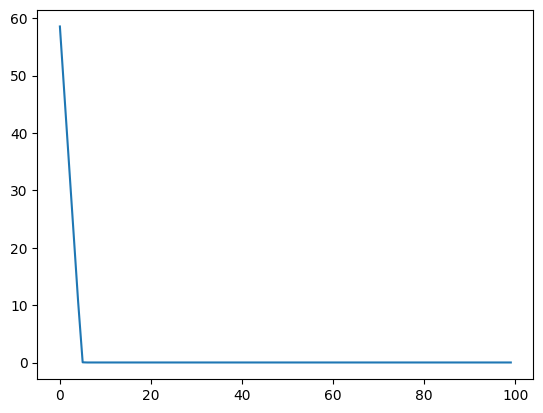

In [261]:
batch_size = 4
epochs = 100
learning_rate = 0.00001
threshold = 2
losses = []

for epoch in range(epochs):
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i:i+batch_size, :]
        y_batch = y[i:i+batch_size]

        # Calculate y_hat
        y_hat = calculate_y_hat(X_batch, w)

        # Calculate cost
        loss = calculate_loss_LogCosh(y_batch, y_hat)

        # Calculate gradient
        dldw = calculate_GD_flex(w, X_batch, y_batch, calculate_y_hat, calculate_loss_LogCosh)

        # Update weights
        w = w - learning_rate * dldw
    
    losses.append(loss)
    print(f'Epoch: {epoch+1} Loss: {loss}')

plt.plot(losses)

